In [4]:
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import  keras
import matplotlib.pyplot as plt

# 모델 로드
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/class_location_js3.keras", custom_objects={'mse': 'mean_squared_error'})

# Species 딕셔너리 예시
species_dict = {
    1: 'crescent_gap',
    2: 'crease',
    3: 'silk_spot',
    4: 'water_spot',
    5: 'welding_line',
    6: 'inclusion',
    7: 'oil_spot',
    8: 'waist folding',
    9: 'rolled_pit',
    10: 'punching_hole'
}  # 클래스 딕셔너리

# 이미지 파일 업로드
# uploaded = files.upload()
# img_path = "/content/drive/MyDrive/project/steel_data/images/images/crease/img_01_425501700_00022.jpg"
img_path = "/content/drive/MyDrive/Colab Notebooks/ai프로젝트/test3.jpg"

# 이미지 파일 읽기
img = cv2.imread(img_path)

# BGR에서 RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 업로드한 이미지 파일 처리
# 이미지 크기 조정 및 전처리
img_resized = cv2.resize(img, (224, 224))  # 모델의 입력 크기에 맞게 이미지 크기 조정
img_resized = np.expand_dims(img_resized, axis=0)  # 배치 차원 추가
# img_resized = img_resized / 255.0  # 정규화
img_resized = img_resized / 127.5 - 1  # -1 ~ 1 정규화

# 모델로 예측
out1, out2, out3, out4, label = model.predict(img_resized)

# 원본 이미지에 Bounding Box와 레이블 그리기
for i in range(1):  # 여기서는 첫 번째 이미지에 대한 결과만 처리
    # Bounding box 좌표 추출
    xmin, ymin, xmax, ymax = out1[0] * img.shape[1], out2[0] * img.shape[0], out3[0] * img.shape[1], out4[0] * img.shape[0]

    # 라벨 인식
    label_pred = species_dict[np.argmax(label[0]) + 1]

    # 원본 이미지에 Bounding box와 예측 라벨 그리기
    cv2.rectangle(img_rgb, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # 초록색 테두리
    cv2.putText(img_rgb, label_pred, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 처리된 이미지를 Matplotlib으로 표시
plt.imshow(img_rgb)
plt.axis('off')  # 축을 숨기기
plt.show()

ValueError: File not found: filepath=/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/class_location_hs.keras. Please ensure the file is an accessible `.keras` zip file.

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


<ipython-input-68-36ea09db58bd>:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(img_copy, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # 초록색 테두리
<ipython-input-68-36ea09db58bd>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.putText(img_copy, f"{class_name} ({confidence * 100:.2f}%)", (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


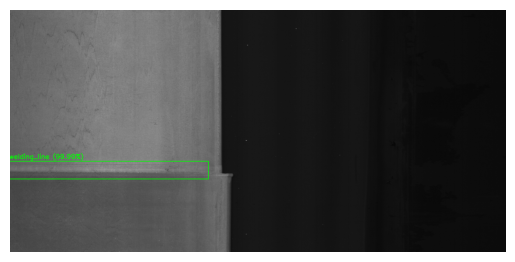

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 모델 로드
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/class_location_js.keras", custom_objects={'mse': 'mean_squared_error'})

# 10가지 불량 유형 딕셔너리
species_dict = {
    1: 'crescent_gap',
    2: 'crease',
    3: 'silk_spot',
    4: 'water_spot',
    5: 'welding_line',
    6: 'inclusion',
    7: 'oil_spot',
    8: 'waist_folding',
    9: 'rolled_pit',
    10: 'punching_hole'
}

# 이미지 파일 경로
img_path = "/content/drive/MyDrive/Colab Notebooks/ai프로젝트/input/images/images/welding_line/img_08_3403334300_00853.jpg"

# 이미지 파일 읽기
img = cv2.imread(img_path)

# BGR에서 RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 크기 조정 및 전처리
img_resized = cv2.resize(img, (224, 224))  # 모델의 입력 크기에 맞게 이미지 크기 조정
img_resized = np.expand_dims(img_resized, axis=0)  # 배치 차원 추가
img_resized = img_resized / 127.5 - 1  # -1 ~ 1 정규화

# 모델로 예측
out1, out2, out3, out4, label = model.predict(img_resized)

# 이미지 복사본 생성 (시각화를 위해 원본을 유지)
img_copy = img_rgb.copy()

# 바운딩 박스 좌표를 한 번만 계산
xmin, ymin, xmax, ymax = out1[0] * img.shape[1], out2[0] * img.shape[0], out3[0] * img.shape[1], out4[0] * img.shape[0]

# 10개의 불량 클래스에 대해 예측된 값을 순회하며 시각화
for i in range(10):
    confidence = label[0][i]  # 각 불량에 대한 예측 확률
    if confidence > 0.01:  # 예측 확률이 50% 이상인 경우에만 시각화
        # 클래스 이름
        class_name = species_dict[i + 1]

        # 바운딩 박스 그리기 (모든 클래스가 동일한 바운딩 박스를 공유)
        cv2.rectangle(img_copy, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # 초록색 테두리
        cv2.putText(img_copy, f"{class_name} ({confidence * 100:.2f}%)", (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 처리된 이미지를 Matplotlib으로 표시
plt.imshow(img_copy)
plt.axis('off')  # 축을 숨기기
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

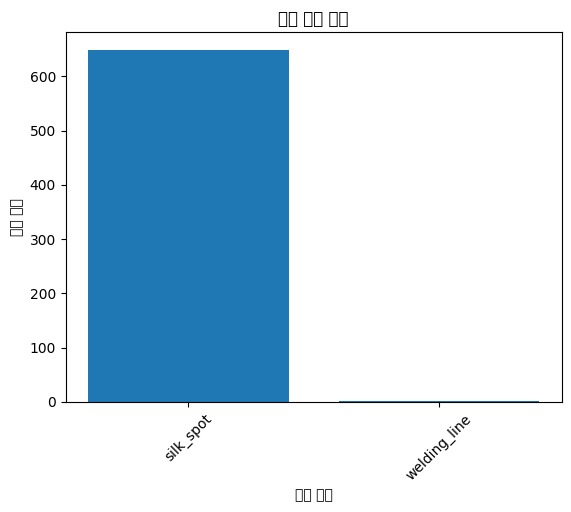

In [ ]:
import os
from collections import defaultdict
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 모델 로드
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ai프로젝트/model/class_location_hs.h5", custom_objects={'mse': 'mean_squared_error'})

# Species 딕셔너리 예시
species_dict = {
    1: 'crescent_gap',
    2: 'crease',
    3: 'silk_spot',
    4: 'water_spot',
    5: 'welding_line',
    6: 'inclusion',
    7: 'oil_spot',
    8: 'waist folding',
    9: 'rolled_pit',
    10: 'punching_hole'
}  # 클래스 딕셔너리

# 이미지가 있는 폴더 경로
folder_path = "/content/drive/MyDrive/Colab Notebooks/ai프로젝트/input/images/images/silk_spot"

folder_label = os.path.basename(folder_path)  # 폴더명을 추출하여 라벨로 사용

# 불량 검출 결과를 저장할 딕셔너리
defect_counts = defaultdict(int)

# 폴더명과 다른 불량이 검출된 이미지 파일명을 저장할 리스트
mismatched_images = []

# 폴더 내 모든 이미지에 대해 예측 수행
for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)

    # 이미지 파일 읽기
    img = cv2.imread(img_path)

    if img is None:
        print(f"이미지를 불러올 수 없습니다: {img_file}")
        continue

    # BGR에서 RGB로 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 이미지 크기 조정 및 전처리
    img_resized = cv2.resize(img, (224, 224))  # 모델의 입력 크기에 맞게 이미지 크기 조정
    img_resized = np.expand_dims(img_resized, axis=0)  # 배치 차원 추가
    img_resized = img_resized / 127.5 - 1  # -1 ~ 1 정규화

    # 모델로 예측
    out1, out2, out3, out4, label = model.predict(img_resized)

    # 라벨 인식
    label_pred = species_dict[np.argmax(label[0]) + 1]

    # 검출된 불량 종류의 횟수 증가
    defect_counts[label_pred] += 1

    # 폴더명과 불량 라벨이 다른 경우, 이미지 파일명을 저장
    if folder_label != label_pred:
        mismatched_images.append(img_file)

# 결과 출력
print("검출된 불량 종류와 횟수:")
for defect, count in defect_counts.items():
    print(f"{defect}: {count}회")

# 폴더명과 다른 불량이 검출된 이미지 파일 출력
if mismatched_images:
    print("\n폴더명과 다른 불량이 검출된 이미지 파일:")
    for img_file in mismatched_images:
        print(img_file)
else:
    print("\n모든 이미지에서 폴더명과 일치하는 불량이 검출되었습니다.")

# 불량 종류별 검출 횟수를 막대 그래프로 시각화
plt.bar(defect_counts.keys(), defect_counts.values())
plt.xlabel('불량 종류')
plt.ylabel('검출 횟수')
plt.title('불량 검출 횟수')
plt.xticks(rotation=45)
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
